### Importación de datos



In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [ ]:

tiendas = [tienda, tienda2, tienda3, tienda4]

for x, df in enumerate(tiendas, start=1):
    ingreso_total = df["Precio"].sum()
    print(f"Ingreso total tienda {x}: ${ingreso_total:,.2f}")


Ingreso total tienda 1: $1,150,880,400.00
Ingreso total tienda 2: $1,116,343,500.00
Ingreso total tienda 3: $1,098,019,600.00
Ingreso total tienda 4: $1,038,375,700.00


In [ ]:

ingreso_tienda1 = tienda["Precio"].sum()
ingreso_tienda2 = tienda2["Precio"].sum()
ingreso_tienda3 = tienda3["Precio"].sum()
ingreso_tienda4 = tienda4["Precio"].sum()


print(f"Ingreso total tienda 1: ${ingreso_tienda1:,.2f}")
print(f"Ingreso total tienda 2: ${ingreso_tienda2:,.2f}")
print(f"Ingreso total tienda 3: ${ingreso_tienda3:,.2f}")
print(f"Ingreso total tienda 4: ${ingreso_tienda4:,.2f}")


Ingreso total tienda 1: $1,150,880,400.00
Ingreso total tienda 2: $1,116,343,500.00
Ingreso total tienda 3: $1,098,019,600.00
Ingreso total tienda 4: $1,038,375,700.00


# 2. Ventas por categoría

In [ ]:

diccionario_tiendas = {
    "Tienda 1": tienda,
    "Tienda 2": tienda2,
    "Tienda 3": tienda3,
    "Tienda 4": tienda4
}

for nombre, df in diccionario_tiendas.items():
    print(f"\n{nombre} - Conteo por categoría:")
    print(df["Categoría del Producto"].value_counts())



Tienda 1 - Conteo por categoría:
Categoría del Producto
Muebles                    465
Electrónicos               448
Juguetes                   324
Electrodomésticos          312
Deportes y diversión       284
Instrumentos musicales     182
Libros                     173
Artículos para el hogar    171
Name: count, dtype: int64

Tienda 2 - Conteo por categoría:
Categoría del Producto
Muebles                    442
Electrónicos               422
Juguetes                   313
Electrodomésticos          305
Deportes y diversión       275
Instrumentos musicales     224
Libros                     197
Artículos para el hogar    181
Name: count, dtype: int64

Tienda 3 - Conteo por categoría:
Categoría del Producto
Muebles                    499
Electrónicos               451
Juguetes                   315
Electrodomésticos          278
Deportes y diversión       277
Libros                     185
Instrumentos musicales     177
Artículos para el hogar    177
Name: count, dtype: int64

Tienda

In [ ]:
import pandas as pd

tiendas = [tienda, tienda2, tienda3, tienda4]

for i, df in enumerate(tiendas, start=1):
    print(f"\nTienda {i} - Conteo por categoría (groupby + size):")
    conteo = df.groupby("Categoría del Producto").size().sort_values(ascending=False)
    print(conteo)



Tienda 1 - Conteo por categoría (groupby + size):
Categoría del Producto
Muebles                    465
Electrónicos               448
Juguetes                   324
Electrodomésticos          312
Deportes y diversión       284
Instrumentos musicales     182
Libros                     173
Artículos para el hogar    171
dtype: int64

Tienda 2 - Conteo por categoría (groupby + size):
Categoría del Producto
Muebles                    442
Electrónicos               422
Juguetes                   313
Electrodomésticos          305
Deportes y diversión       275
Instrumentos musicales     224
Libros                     197
Artículos para el hogar    181
dtype: int64

Tienda 3 - Conteo por categoría (groupby + size):
Categoría del Producto
Muebles                    499
Electrónicos               451
Juguetes                   315
Electrodomésticos          278
Deportes y diversión       277
Libros                     185
Artículos para el hogar    177
Instrumentos musicales     177
dtype: i

# 3. Calificación promedio de la tienda


In [ ]:

diccionario_tiendas = {
    "Tienda 1": tienda,
    "Tienda 2": tienda2,
    "Tienda 3": tienda3,
    "Tienda 4": tienda4
}

for nombre, df in diccionario_tiendas.items():
    promedio = df["Calificación"].mean()
    print(f"Calificación promedio en {nombre}: {promedio:.2f}")


Calificación promedio en Tienda 1: 3.98
Calificación promedio en Tienda 2: 4.04
Calificación promedio en Tienda 3: 4.05
Calificación promedio en Tienda 4: 4.00


In [ ]:

tiendas = [tienda, tienda2, tienda3, tienda4]

for i in range(len(tiendas)):
    df = tiendas[i]
    promedio = df["Calificación"].mean()
    print(f"Calificación promedio tienda {i+1}: {promedio:.2f}")


Calificación promedio tienda 1: 3.98
Calificación promedio tienda 2: 4.04
Calificación promedio tienda 3: 4.05
Calificación promedio tienda 4: 4.00


# 4. Productos más y menos vendidos


Tienda 1 - Productos más y menos vendidos:
  Más vendido: Microondas (60 ventas)
  Menos vendido: Auriculares con micrófono (33 ventas)


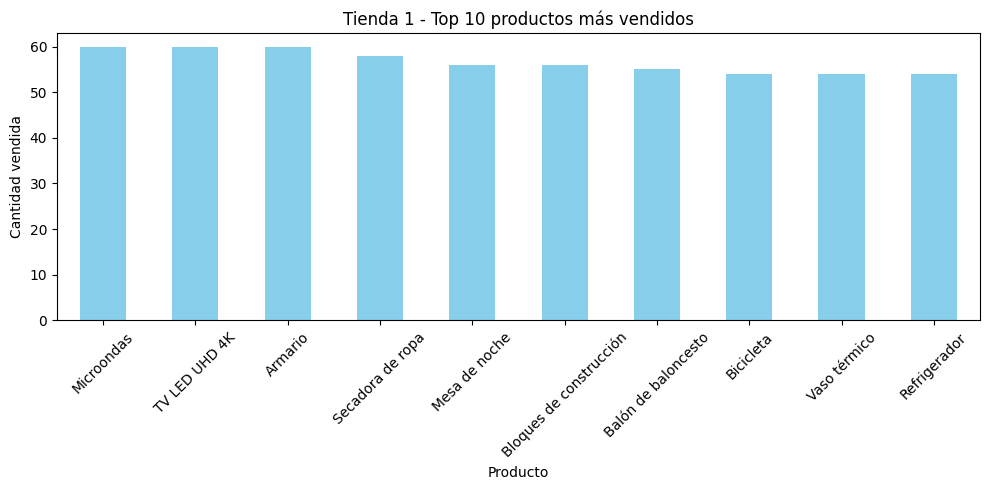


Tienda 2 - Productos más y menos vendidos:
  Más vendido: Iniciando en programación (65 ventas)
  Menos vendido: Juego de mesa (32 ventas)


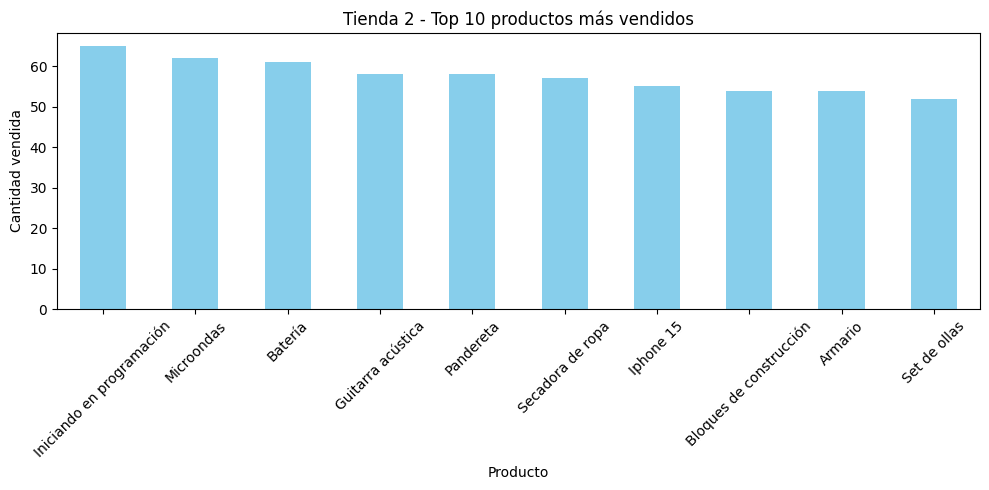


Tienda 3 - Productos más y menos vendidos:
  Más vendido: Kit de bancas (57 ventas)
  Menos vendido: Bloques de construcción (35 ventas)


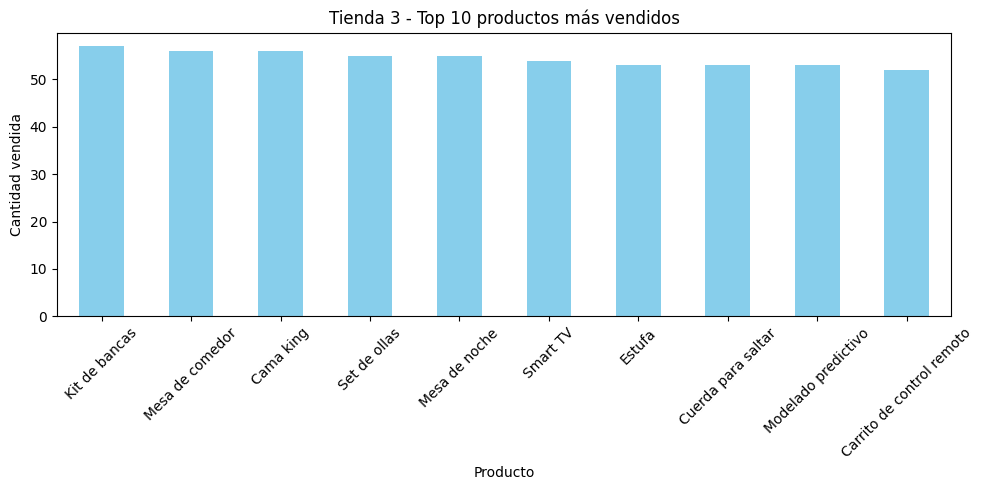


Tienda 4 - Productos más y menos vendidos:
  Más vendido: Cama box (62 ventas)
  Menos vendido: Guitarra eléctrica (33 ventas)


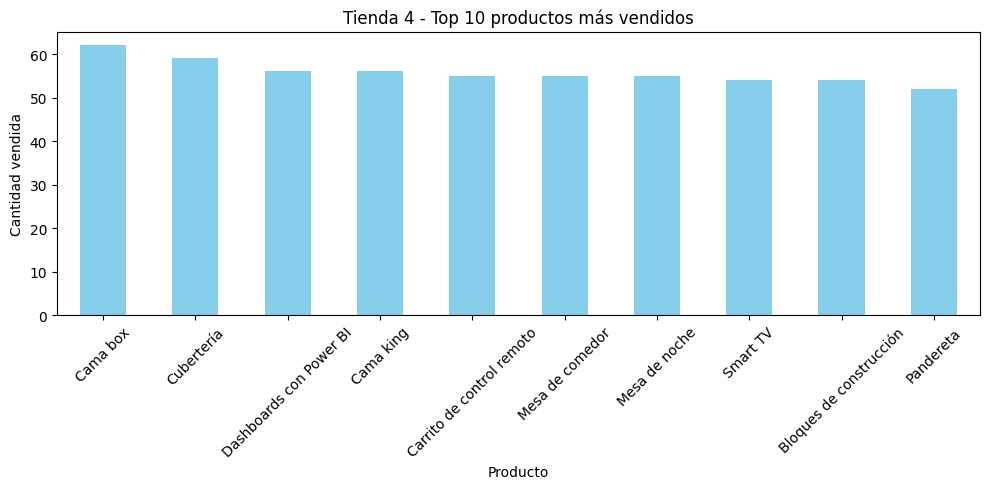

In [ ]:
import matplotlib.pyplot as plt

diccionario_tiendas = {
    "Tienda 1": tienda,
    "Tienda 2": tienda2,
    "Tienda 3": tienda3,
    "Tienda 4": tienda4
}

for nombre, df in diccionario_tiendas.items():
    print(f"\n{nombre} - Productos más y menos vendidos:")

    productos_vendidos = df["Producto"].value_counts()

    producto_mas = productos_vendidos.idxmax()
    cantidad_mas = productos_vendidos.max()

    producto_menos = productos_vendidos.idxmin()
    cantidad_menos = productos_vendidos.min()

    print(f"  Más vendido: {producto_mas} ({cantidad_mas} ventas)")
    print(f"  Menos vendido: {producto_menos} ({cantidad_menos} ventas)")

    plt.figure(figsize=(10, 5))
    productos_vendidos.head(10).plot(kind="bar", color="skyblue")
    plt.title(f"{nombre} - Top 10 productos más vendidos")
    plt.xlabel("Producto")
    plt.ylabel("Cantidad vendida")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


# 5. Envío promedio por tienda

Tienda 1 - Costo de envío promedio: $26,018.61
Tienda 2 - Costo de envío promedio: $25,216.24
Tienda 3 - Costo de envío promedio: $24,805.68
Tienda 4 - Costo de envío promedio: $23,459.46


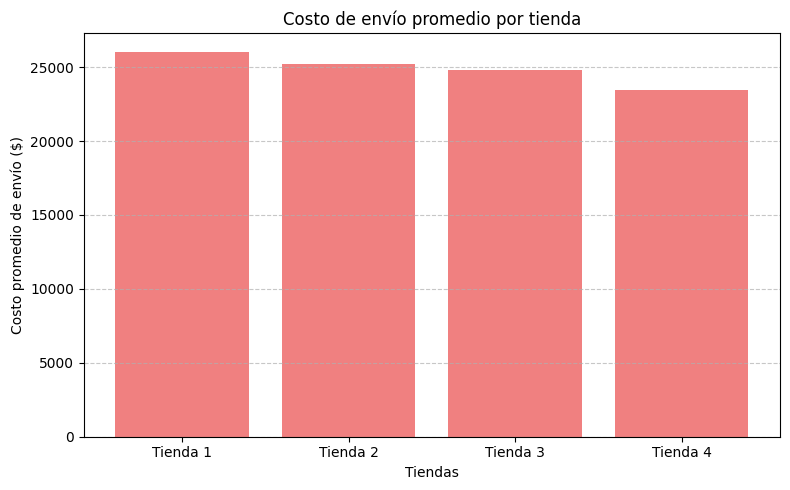

In [ ]:
import matplotlib.pyplot as plt

diccionario_tiendas = {
    "Tienda 1": tienda,
    "Tienda 2": tienda2,
    "Tienda 3": tienda3,
    "Tienda 4": tienda4
}

nombres_tiendas = []
promedios_envio = []

for nombre, df in diccionario_tiendas.items():
    promedio_envio = df["Costo de envío"].mean()
    nombres_tiendas.append(nombre)
    promedios_envio.append(promedio_envio)
    print(f"{nombre} - Costo de envío promedio: ${promedio_envio:,.2f}")

plt.figure(figsize=(8, 5))
plt.bar(nombres_tiendas, promedios_envio, color="lightcoral")
plt.title("Costo de envío promedio por tienda")
plt.ylabel("Costo promedio de envío ($)")
plt.xlabel("Tiendas")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

